<a href="https://colab.research.google.com/github/neerajguleria1/driver-drowsiness-detection/blob/main/Day22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Speed  Alertness  Seatbelt  Drowsy
0    120        0.9         1       0
1     40        0.6         0       0
2    150        0.7         1       0
3    220        0.3         1       1
4     89        0.5         0       1
5    240        0.3         1       1
6    310        0.2         1       0
7    410        0.1         1       1
8    180        0.6         0       0
9    270        0.4         1       1
Accurracy 33.33 %

 Confusing matrix:
 [[0 2]
 [0 1]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


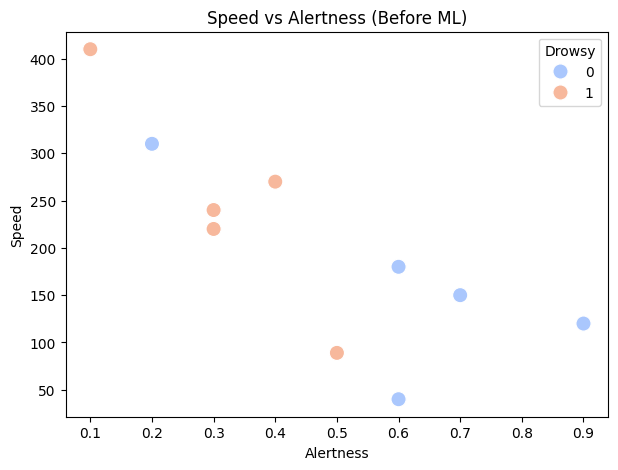

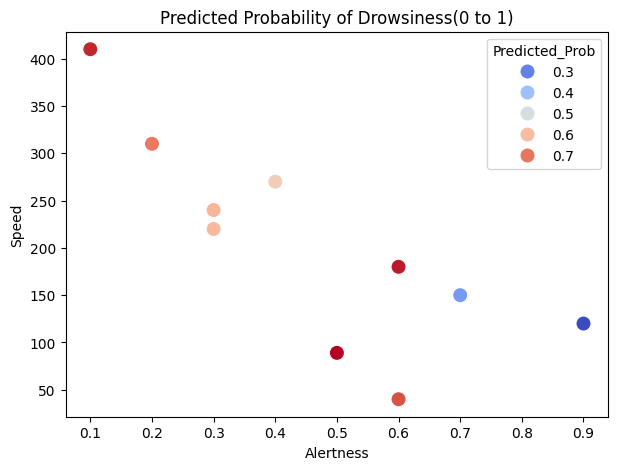

     Feature  Coefficient
0      Speed     0.200524
1  Alertness    -0.624218
2   Seatbelt    -0.584960
Probability of Drowsiness: 55.07%
Prediction: Drowsy


In [15]:
# Logistic Regression Deep Dive+ Feature Scaling + Visualization
'''Understand how Logistic Regression works internally (sigmoid function)
 Visualize the decision boundary
 Scale your features for better accuracy
 See how each feature affects prediction'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

data={
     'Speed':[120,40,150,220,89,240,310,410,180,270],
    'Alertness':[0.9,0.6,0.7,0.3,0.5,0.3,0.2,0.1,0.6,0.4],
    'Seatbelt':[1,0,1,1,0,1,1,1,0,1],
    'Drowsy':[0,0,0,1,1,1,0,1,0,1]
 }
df=pd.DataFrame(data)
print(df)

# Split Data
X=df[['Speed','Alertness','Seatbelt']]#input to model
y=df['Drowsy']#output to predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)# 30% data for testing and 70% for training and random_state fixes randomness
#X_train,y_train are used to train model and X_test,y_test are used for testing

# Feature Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

'''StandardScaler → makes all features on same scale (mean = 0, std = 1).
→ Helps model train faster & fair.
fit_transform(X_train) →
Learns mean & std from training data
Applies scaling on it
transform(X_test)
Uses same mean & std from training
Scales test data (no leakage)'''

#Train Model
model=LogisticRegression() # creates a classification model give yes or no
model.fit(X_train_scaled,y_train) # In this models learn pattern how speed, alertness,seatbelt affect using drowsy,adjust internal fit for training data.


# Predict & Evalute
y_pred=model.predict(X_test_scaled)
print("Accurracy",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("\n Confusing matrix:\n",confusion_matrix(y_test,y_pred))
print("\n Classification Report:\n",classification_report(y_test,y_pred))

# Visualize Decision Boundary
plt.figure(figsize=(7,5))
sns.scatterplot(x='Alertness',y='Speed',hue="Drowsy",data=df,s=120,palette="coolwarm")
plt.title("Speed vs Alertness (Before ML)")
plt.show()

probs=model.predict_proba(scaler.transform(df[['Speed','Alertness','Seatbelt']]))[:,-1]
df['Predicted_Prob']=probs
plt.figure(figsize=(7,5))
sns.scatterplot(x='Alertness',y='Speed',hue='Predicted_Prob',data=df,palette='coolwarm',s=120)
plt.title("Predicted Probability of Drowsiness(0 to 1)")
plt.show()

# Check Model Coeffecints
feature_importance=pd.DataFrame({
    'Feature':X.columns,
    'Coefficient':model.coef_[0]
})
print(feature_importance)

# Now we predict on New Input
new_driver=pd.DataFrame({
    'Speed':'300',
    'Alertness':[0.45],
    'Seatbelt':[1]
})
scaled_input=scaler.transform(new_driver)
prob=model.predict_proba(scaled_input)[0][1]

print(f"Probability of Drowsiness: {round(prob*100,2)}%")
print("Prediction:","Drowsy" if prob>0.5  else "Alert")
